**Luhang Sun & Roujia Zhong**

Fall 2020

CS343: Neural Networks

Project 1: Single layer networks

**Submission reminders**:
- Submit rubric on Google Classroom
- Submit one .zip file per team on Google Classroom. Includes:
    - All .ipynb notebook files
    - All .py code files
    - Data files under 10 MB
- Did you answer all 15 questions?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from adaline import Adaline

# Set the color style so that Professor Layton can see your plots
plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
# Make the font size larger
plt.rcParams.update({'font.size': 20})

# Turn off scientific notation when printing
np.set_printoptions(suppress=True, precision=3)

# Automatically reload your external source code
%load_ext autoreload
%autoreload 2


def plot_adaline_train(net, loss_list, acc_list, plotMarkers=False):
    n_epochs = len(loss_list)
    
    x = np.arange(1, n_epochs+1)
    
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
    fig.suptitle(f'ADALINE ({n_epochs} epochs)')
    
    curveStr = '-r'
    if plotMarkers:
        curveStr += 'o'
    
    ax1.plot(x, loss_list, curveStr)
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss (Sum squared error)')
    ax2.plot(x, acc_list, curveStr)
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    
    plt.show()

**Paste in your code to load Old Faithful data with standardized features below**

In [2]:
df = pd.read_csv("old_faithful.csv", header=0)
data = df.loc[:,["eruptions", "waiting"]].to_numpy()
output = df["severe"].to_numpy()
#preprocess the data
standardized_data = (data - np.mean(data, axis = 0))/ np.std(data, axis = 0)

## Task 4: ADALINE for regression

Given ADALINE's linear (identity) activation and sum-of-squares loss function, the learned weights can be used for more than just classification. In this task, you will use ADALINE to perform a linear regression (*the same neural network subsumes what you did in CS251!*).

### Goal

Your goal is to get an ADALINE network to predict `waiting` from `eruptions`. That is, you are setting up a simple (bivariate) linear regression with equation $$y_i = m \times x_i + b$$where the "x" variable (*predictor variable*) is `eruptions` and the "y" variable (*response variable*) is `waiting` (raw).

**Ultimately, you want to draw a regression line *through* the Old Faithful data clusters to *join* rather than divide them.**

### Design

You can do the regression with the exact network you have currently implemented. **You shouldn't make any code changes to your `Adaline` class.**  In the cell below, use your network to set up the regression by making appropriate design choices:
- Network input features: How many? What should they be?
- Weights: What do they mean in this problem context?
- What are the "classes"?

### Tips

- I suggest using the standardized version of the predictor (otherwise you may run into numeric stability issues), but it's fine to use the raw/unstandardized response variable. 
- Default hyperparameters should work well.
- You may need to add a singleton dimension below so that your existing code works i.e. `shape=(272,1)`, NOT `shape=(272,)`

**Write your training code in the cell below.**

In [3]:
eruptions = standardized_data[:,0].reshape(len(standardized_data),1)
waiting = standardized_data[:,1]

#training process
net = Adaline()
loss, acc = net.fit(eruptions, waiting)

In the cell below, **create a scatter plot of the data and the overlayed regression line**. Have the x-axis map onto standardized `eruptions` and y-axis onto raw `waiting` values.

### Tips
- You will need to leverage the model linear equation to go from x values to predicted y values. $y_i = m \times x_i + b$
- Look at the class boundary plot code that you used for classification. You will need to generate linearly spaced x values before plotting your regression y values on your regression line. 

[-0.     0.901]


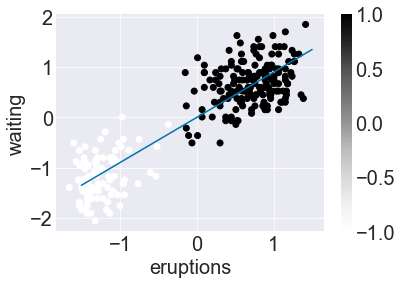

In [4]:
wts = net.get_wts()
print(wts)

#generate 50 samples
x_i = np.linspace(-1.5, 1.5, 50, endpoint=True)
#compute y_i values
y_i = x_i * wts[1] + wts[0]

#scatter using class labels
plt.scatter(eruptions, waiting, c=output)
plt.colorbar()
plt.xlabel("eruptions")
plt.ylabel("waiting")

#add the boundary
plt.plot(x_i, y_i)
plt.show()

## Task 5: ADALINE and logistic regression

In this task, you will extend ADALINE to logistic regression, where we explicitly represent the probability of class membership.

For example data point $i$ is 80% likely to be in class A and 20% in class B.

**Remember:** Despite the name, logistic regression is actually about solving a **classification** problem. So this is more similar to Task 2 than Task 5.

### 5a. Implement logistic regression

Create a subclass of `Adaline` called `AdalineLogistic` in a new file called `adaline_logistic.py`. **Only override existing methods as needed to make the following changes. DO NOT MODIFY `adaline.py` FOR ANY REASON!!**.

#### Design

1. Use the sigmoid activation function. $z = f(x) = \frac{1}{1+e^{-x}}$
2. Represent the output classes as 0 or +1. This should require a code change (activation values >=0.5 are classified as 1, otherwise class 0) and preprocessing of the old faithful data.
3. Use the cross-entropy loss function: $\sum_{i=1}^n \left [ -y_i Log(z_i) - (1-y_i)Log(1 - z_i) \right ] $
where $z_i$ is the activation to input sample $i$ and $y_i$ is the corresponding $i^{th}$ class label (0 or 1).


#### Todo below:

- Train your network using the standardized Old Faithful data. Default hyperparameters should work fine.
- Plot your loss and accuracy as a function of epoch.
- Plot the logistic regression decision boundary and the data (Use your code from Task 2).

#### Questions

**Question 11.** Why do we need to relabel the classes from -1/+1 to 0/1?

#### Answers

11. Because the output from the net activation function $z = f(x) = \frac{1}{1+e^{-x}}$ falls within (0,1). If we still keep the class labels as -1/+1, our loss calculations will be inaccurate.

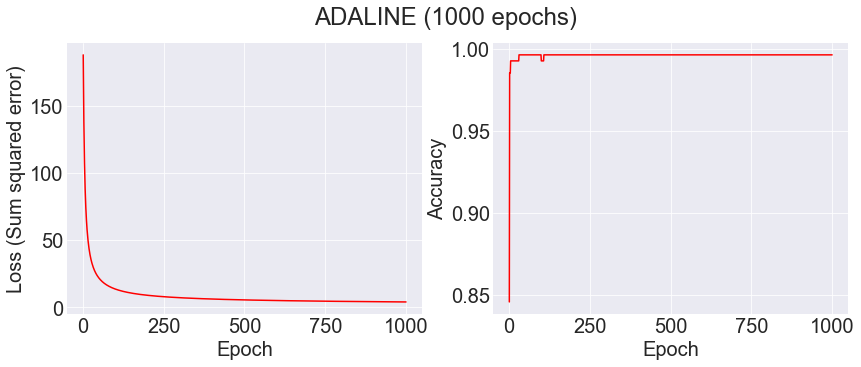

In [5]:
from adaline_logistic import AdalineLogistic
al = AdalineLogistic()

# code change of output
output_lr = output.copy()
output_lr[output_lr == -1] = 0

loss_hist, acc_hist = al.fit(standardized_data, output_lr)
plot_adaline_train(al, loss_hist, acc_hist)

In [6]:
# Print your learned wts here
print(al.get_wts())

[2.183 4.104 2.735]


$log(1)=2.183+4.106x_1+2.733x_2$

$0=2.183+4.106x+2.733y$

$-2.733y=2.183+4.106x$

$y=-0.799-1.502x$

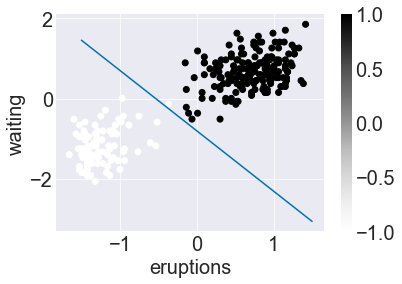

In [7]:
transformed_weights = [2.183/(-2.733), 4.106/(-2.733), 1]

x_i = np.linspace(-1.5, 1.5, 50, endpoint=True)
y_i = x_i * transformed_weights[1] + transformed_weights[0]

# plot logistic regression classification
plt.scatter(standardized_data[:,0], standardized_data[:,1], c=output)
plt.xlabel("eruptions")
plt.ylabel("waiting")

#add the boundary
plt.plot(x_i, y_i)
plt.colorbar()
plt.show()

### 5b. Test point probabilities

#### Questions

**Question 12.** Determine the probability that the following test points belong to **either class**:

Format: standardized (eruptions, waiting)
- (0.4, 0.98)
- (0.5, -2)
- (-1, 0.5)

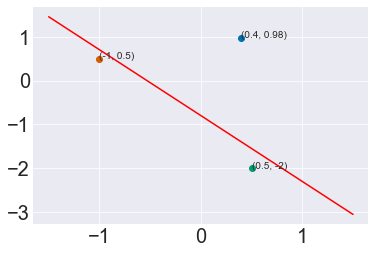

In [8]:
# graph the points on the plot with the boundary line
# boundary
plt.plot(x_i, y_i, c="red")
plt.scatter(0.4, 0.98)
plt.text(0.4, 0.98, "(0.4, 0.98)", fontsize=10)
plt.scatter(0.5, -2)
plt.text(0.5, -2, "(0.5, -2)", fontsize=10)
plt.scatter(-1, 0.5)
plt.text(-1, 0.5, "(-1, 0.5)", fontsize=10)
plt.show()

In [9]:
data = np.array([[0.4, 0.98], [0.5, -2], [-1, 0.5]])
wts = al.get_wts() # wts from training phase
net_in = data @ wts[1:] + wts[0]
net_act = al.activation(net_in)
print(f"possibility to be in class 0: {1-net_act}")
print(f"possibility to be in class 1: {net_act}")

possibility to be in class 0: [0.001 0.775 0.635]
possibility to be in class 1: [0.999 0.225 0.365]


#### Answers

12. 
- (0.4, 0.98): 0.1% to be in class 0, 99.9% to be in class 1
- (0.5, -2): 77.5% to be in class 0, 22.5% to be in class 1
- (-1, 0.5): 63.5% to be in class 0, 36.5% to be in class 1

## Task 6: Network classification performance comparison

In this task, you will compare the performance of the two classification networks that you have built, plus a new one called Perceptron, on a larger dataset ([Ionosphere dataset](https://archive.ics.uci.edu/ml/datasets/Ionosphere)). A **Perceptron** is a single-layer neural network that works exactly the same as ADALINE, except it uses a different network activation function (`netAct`). The activation function computes the `netAct` as follows:

$$\text{netAct}_i = f(\text{netIn}_i) = 1  \text{ if netIn}_i \geq 0$$
$$\text{netAct}_i = f(\text{netIn}_i) = -1 \text{ if netIn}_i < 0$$

### 6a. Create a Perceptron network and test it on Old Faithful data

- Create a new class in `adaline.py` that will represent your Perceptron classifier. It should inherit from `Adaline`. Override/write any necessary functions. **Hint:** This should be really quick, short, and simple.
- Use the `plot_nets_train` function below to create a "1x2" row of plots that resembles `plot_adaline_train`, where the left plot shows the loss over epochs and the right plot shows the accuracy over epochs. In each of these two plots, you should have three curves: one for ADALINE, one for logistic regression, one for the Perceptron.

If your Perceptron is working, you should see similar (but not identical) plots to those produced by ADALINE.

In [10]:
def plot_nets_train(nets, loss_lists, acc_lists, net_names, plotMarkers=False):
    '''Creates a 1x2 grid of plots showing loss over epochs (left column) and
    accuracy over epochs (right column) for one or more network (num_nets in total).
    Generalizes `plot_adaline_train` for multiple trained networks.
    
    For example, in the case of two networks (e.g. adaline and perceptron; num_nets=2),
    there would be two curves in each of the two plots.
    
    Put differently, the following function call would produce the same pair of plots you've
    been getting up until this point with a single adaline network:
        plot_adaline_train(nets[0], loss_lists[0], acc_lists[0], plotMarkers=plotMarkers)
    
    Parameters:
    -----------
    nets: Python list of network objects. len(nets) = num_nets.
    loss_lists: Python lists of ndarrays. len(loss_lists) = num_nets. len(loss_lists[0]) = n_epochs.
        This would be a list of the loss histories for each of the nets being plotted.
    acc_lists: Python lists of ndarrays. len(acc_lists) = num_nets. len(acc_lists[0]) = n_epochs.
        This would be a list of the accuracy histories for each of the nets being plotted.
    net_names: Python list of str. len(net_names) = num_nets.
        Identifying names of each net (e.g. for legend).
    plotMarkers: boolean.
        Should we draw a plot marker at each epoch on each curve?
    '''
    n_nets = len(nets)
    n_epochs = len(loss_lists[0])
    
    colors = ['orange', 'blue', 'red']
    
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
    fig.suptitle(f'{n_nets} networks trained for ({n_epochs} epochs)')
    
    for net, loss_list, acc_list, color in zip(nets, loss_lists, acc_lists, colors):
        x = np.arange(1, n_epochs+1)

        curveStr = '-r'
        if plotMarkers:
            curveStr += 'o'

        ax1.plot(x, loss_list, curveStr, c=color)
        ax1.set_xlabel('Epoch')
        ax1.set_ylabel('Loss (Sum squared error)')
        ax2.plot(x, acc_list, curveStr, c=color)
        ax2.set_xlabel('Epoch')
        ax2.set_ylabel('Accuracy')
    
    plt.legend(net_names)
    plt.show()

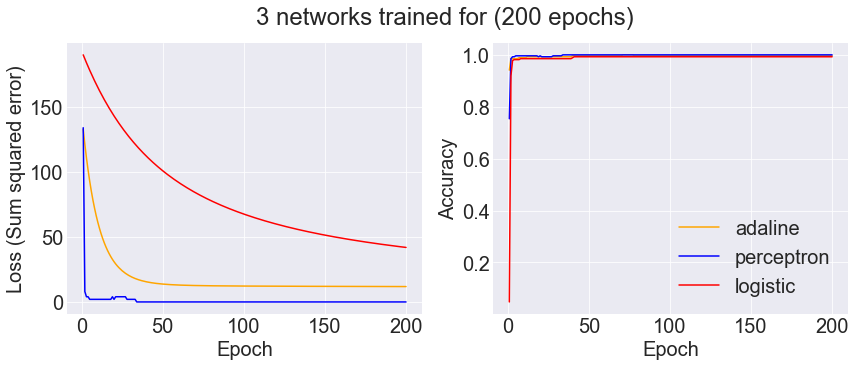

In [11]:
from adaline import Perceptron

df = pd.read_csv("old_faithful.csv", header=0)
data = df.loc[:,["eruptions", "waiting"]].to_numpy()
output = df["severe"].to_numpy()
#preprocess the data
standardized_data = (data - np.mean(data, axis = 0))/ np.std(data, axis = 0)

# code change of output
output_lr = output.copy()
output_lr[output_lr == -1] = 0

#ADALINE
adaline_net = Adaline()
loss_1, acc_1 = adaline_net.fit(standardized_data, output, n_epochs=200, lr=0.0001)

#Perceptron
perceptron_net = Perceptron()
loss_2, acc_2 = perceptron_net.fit(standardized_data, output, n_epochs=200, lr=0.0001)

#logistics
logistic_net = AdalineLogistic()
loss_3, acc_3 = logistic_net.fit(standardized_data, output_lr, n_epochs=200, lr=0.0001)

plot_nets_train([adaline_net, perceptron_net, logistic_net], [loss_1, loss_2, loss_3], [acc_1, acc_2, acc_3], ['adaline', 'perceptron', 'logistic'], plotMarkers=False)

### 6b. The Ionosphere dataset

The [Ionosphere dataset](https://archive.ics.uci.edu/ml/datasets/Ionosphere) is radar signal data collected in Goose Bay, Labrador. It is a more complex dataset than old faithful, with 33 features (but still 2 classes). The class values are coded 'g' for good radar signal and 'b' for bad radar signal.

**Please download the CSV file from the CS343 project website (not above UCI link)** — I have slightly modified the dataset for your convenience.

####  Comparing classifier performance

Your goal is to train, compare, and analyze the performance of your ADALINE, logistic regression, and Perceptron networks on the Ionosphere dataset. How you do this is up to you (including hyperparameters), but you should include the following two plots and answer the below questions.
- One 1x2 plot showing training loss and accuracy of the three networks.
- Two scatter plots (one per network) showing the feature at index 4 on x-axis and the feature at index 19 on the y-axis. Samples should be color coded one of two colors: whether the class was correctly or incorrectly predicted. The data should be plotted on their original scale (i.e. not normalized).

I encourage you to play with the hyperparameters, but in the final plots that you turn-in, please use the same hyperparameter values across the networks to show a fair comparison.

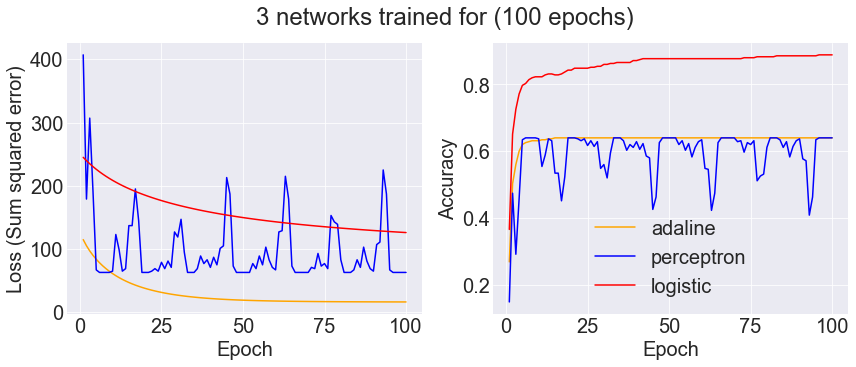

In [12]:
df = pd.read_csv("ionosphere.csv", header=0)
data = df.iloc[:,0:32].to_numpy()
output = df.iloc[:,-1].to_numpy()
output = pd.factorize(output)[0]
#'b': 0; 'g': 1

#preprocess the data
standardized_data = (data - np.mean(data, axis = 0))/ np.std(data, axis = 0)

#using the three networks to train:
#ADALINE
adaline_net = Adaline()
loss_1, acc_1 = adaline_net.fit(standardized_data, output, n_epochs=100, lr=0.0001)

#Perceptron
perceptron_net = Perceptron()
loss_2, acc_2 = perceptron_net.fit(standardized_data, output, n_epochs=100, lr=0.0001)

# code change of output
output_lr = output.copy()
output_lr[output_lr == -1] = 0

#logistics
logistic_net = AdalineLogistic()
loss_3, acc_3 = logistic_net.fit(standardized_data, output_lr, n_epochs=100, lr=0.0001)

plot_nets_train([adaline_net, perceptron_net, logistic_net], [loss_1, loss_2, loss_3], [acc_1, acc_2, acc_3], ['adaline', 'perceptron', 'logistic'], plotMarkers=False)

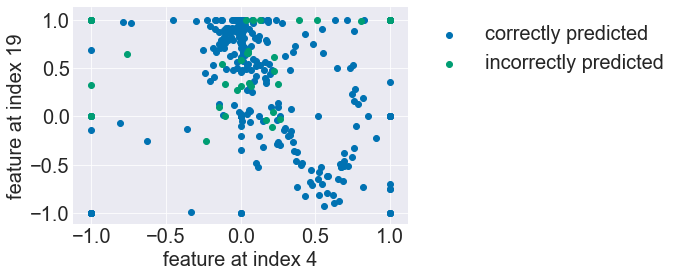

In [13]:
#scatter plots section
# plot logistic regression classification
y_pred = logistic_net.y_pred
#check which ones are predicted correctly
diff = y_pred-output
#select those that are not 0
incorrect_idx = np.where(diff != 0)[0]
#select those that are 0
correct_idx = np.where(diff == 0)[0]

fig, ax = plt.subplots()
#plot correct ones
ax.scatter(data[correct_idx,4], data[correct_idx,19], label='correctly predicted')
#plot incorrect ones
ax.scatter(data[incorrect_idx,4], data[incorrect_idx,19], label='incorrectly predicted')
plt.xlabel("feature at index 4")
plt.ylabel("feature at index 19")
plt.legend(bbox_to_anchor=(1.01,1), loc=2)


plt.show()

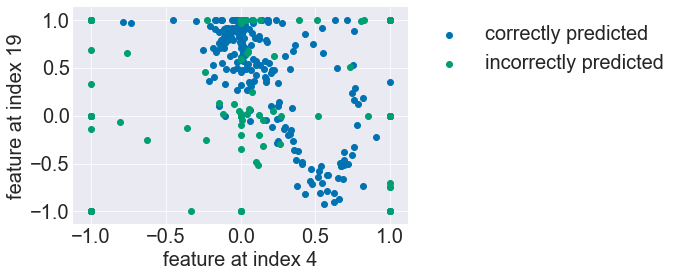

In [14]:
# plot adaline regression classification
y_pred = adaline_net.y_pred
#check which ones are predicted correctly
diff = y_pred-output
#select those that are not 0
incorrect_idx = np.where(diff != 0)[0]
#select those that are 0
correct_idx = np.where(diff == 0)[0]

fig, ax = plt.subplots()
#plot correct ones
ax.scatter(data[correct_idx,4], data[correct_idx,19], label='correctly predicted')
#plot incorrect ones
ax.scatter(data[incorrect_idx,4], data[incorrect_idx,19], label='incorrectly predicted')
plt.xlabel("feature at index 4")
plt.ylabel("feature at index 19")
plt.legend(bbox_to_anchor=(1.01,1), loc=2)
plt.show()

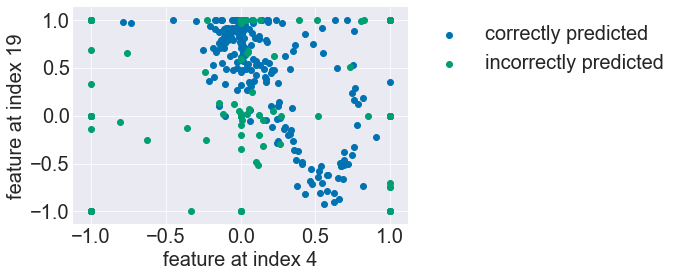

In [15]:
# plot perceptron regression classification
y_pred = perceptron_net.y_pred
#check which ones are predicted correctly
diff = y_pred-output
#select those that are not 0
incorrect_idx = np.where(diff != 0)[0]
#select those that are 0
correct_idx = np.where(diff == 0)[0]

fig, ax = plt.subplots()
#plot correct ones
ax.scatter(data[correct_idx,4], data[correct_idx,19], label='correctly predicted')
#plot incorrect ones
ax.scatter(data[incorrect_idx,4], data[incorrect_idx,19], label='incorrectly predicted')
plt.xlabel("feature at index 4")
plt.ylabel("feature at index 19")
plt.legend(bbox_to_anchor=(1.01,1), loc=2)
plt.show()

#### Questions

**Question 13.** What final accuracy are you able to achieve on the Ionosphere dataset with the three networks?

**Question 14.** Play with the hyperparameters a bit.<br/>(a) For the network that achieves the best final epoch accuracy, what is its key advantage (other than better final accuracy)?<br/>(b) What advantage do the runner-up networks have over the winner, based on the training plots? Explain.

**Question 15.** In your scatter plots showing correct and incorrect sample classifications, how is it possible that misclassifications do not appear to either side of a simple boundary?

#### Answers

13. Adaline: around 0.65; Perceptron: around 0.65; Logistic: around 0.9.

14. Logistic network always achieves the best final epoch accuracy. The key advantage is that it gives the probability of each data point being in class 0 vs. class 1. The runner-up network is Adaline. The key advantage is that the loss is the lowest among the three networks.

15. In the scatterplot of logistic network, misclassifications do not appear to either side of a simple boundary. In the scatterplot of perceptron network and adaline, there are misclassifications appearing to either side of a simple boundary.

## Extensions

**NOTE:** Never integrate extensions into your base project so that it changes the expected behavior of core functions. If your extension changes the core design/behavior, no problem, duplicate your working base project and add features from there.

Generally, a small number of "in-depth" extensions count for more than many "shallow" extensions.

1. Extend the ADALINE model to multi-class classification using the One-Vs-Rest (OvR) method. Recall that with this scheme, we train multipler networks with each of the $n$ output classes serving as the +1 class (others set to 0 class). For example, for classes [a, b, c] would would train the networks with the following class labels: [1, 0, 0], [0, 1, 0], [0, 0, 1], respectively. We then classify based on the class that generates the highest max probability / activation value. Test it on a dataset with more than two classes (e.g. Iris). 
2. Create plots of the ADALINE regression after training on different numbers of epochs. One options is to plot all the curves in a single plot and establish a color scheme for time so that the viewer can visually discern the time sequence. Another possibility is to create a NxM grid of plots showing the progression (be sure to label the titles with #epochs).
3. Demonstrate how ADALINE can handle multiple linear regression.
4. Test the performance of single layer neural networks at classifying a binary class dataset of your choice.
5. Compare the performance of ADALINE, Perceptron, and Logistic Regression single-layer networks in additional ways and/or with additional datasets.
6. (Small) Make your early stopping implementation fancier. For example, only stop if the change relative to the average loss over the most recent few epochs is less than the tolerance. Why could this be an improvement over the other method?

**Extension 6:** Make early stopping implementation to only terminate back propagation if the average loss difference over the most recent 5 epochs is less than the tolerance. Test the effect on old_faithful. Also use a pairwise comparision to examine the effect of different data preprocessing strategy: global in-max normalization and centralized standardization (using std) with different early stopping methods. 

In [19]:
adaline_6 = Adaline()

# re-process the old faithful data
df_of = pd.read_csv("old_faithful.csv", header=0)
data_of = df_of.loc[:,["eruptions", "waiting"]].to_numpy()
output_of = df_of["severe"].to_numpy()
standardized_of = (data_of - np.mean(data_of, axis = 0))/ np.std(data_of, axis = 0)
normalized_of = (data_of - data_of.min())/(data_of.max()-data_of.min())

print("standardization using mean and std: ")
loss1, acc1 = adaline_6.fit_early_stopping(standardized_of, output_of, early_stopping=True)
print(f"    final loss: {loss1[-1]}")
print(f"    final accuracy: {acc1[-1]}\n--")
loss2, acc2 = adaline_6.fit_early_stopping_fancy(standardized_of, output_of, fancy_stop=True)
print(f"    final loss: {loss2[-1]}")
print(f"    final accuracy: {acc2[-1]} \n-------------------")

print("global max-min normalization: ")
loss1, acc1 = adaline_6.fit_early_stopping(normalized_of, output_of, early_stopping=True)
print(f"    final loss: {loss1[-1]}")
print(f"    final accuracy: {acc1[-1]}\n--")
loss2, acc2 = adaline_6.fit_early_stopping_fancy(normalized_of, output_of, fancy_stop=True)
print(f"    final loss: {loss2[-1]}")
print(f"    final accuracy: {acc2[-1]}")

standardization using mean and std: 
number of epochs in early stopping: 9
    final loss: 12.221965869561831
    final accuracy: 0.9963235294117647
--
number of epochs in fancy stopping: 12
    final loss: 12.11109570663125
    final accuracy: 0.9963235294117647 
-------------------
global min-max normalization: 
number of epochs in early stopping: 268
    final loss: 37.26041887125146
    final accuracy: 0.9705882352941176
--
number of epochs in fancy stopping: 270
    final loss: 37.072818547029186
    final accuracy: 0.9705882352941176


As shown in the outputs, keeping learning rates the termination tolerance threshold the same, data preprocessed by standardization took much fewer epochs to train compated to data preprocessed by max-min normalization. This is because standardization centralizes our data using std, making them centers around 0, which is the class boundary between -1/+1. Therefore, the network is able to learn faster because the data are already preprocessed in a way that it will generate decent predictions/losses. On the other hand, min-max normalization which has a mean around 0.5, making it take more work to learn -1/+1.

Early stopping-wise, the fancy early stopping model took slightly more steps because it continues from the standard of normal early stopping 